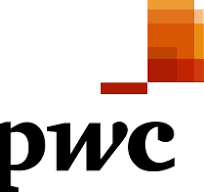

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

PwC has tasked your team with conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

## **📈 Phase 1: Understanding the Customer Base**
### **Objective:** Summarize key customer insights

### **1. Churn Percentage**  
- What percentage of customers are leaving?  

### **2. Customer Segments**  
- Analyze customer demographics (Age, Gender, Tenure).  

### **3. Services Used**  
- Do churned customers have **Internet, Phone, or TV services**?  

### **4. Billing & Payment Methods**  
- Do churned customers prefer **paperless billing, credit cards, or bank transfers**?  

### **5. Contract Types**  
- Are **monthly contract customers** churning more than **annual contract customers**?  

---

## **🤖 Phase 2: Predicting Customer Churn**
### **Objective:** Build a churn prediction model to identify at-risk customers.

### **1. Feature Selection**
Identify key factors influencing churn, such as tenure, contract type, payment method, and monthly charges.

### **2. Model Training**
Train a classification model (Logistic Regression, Decision Tree, or XGBoost) to predict churn.

### **3. Performance Evaluation**
Assess model accuracy, precision, recall, F1-score, and AUC-ROC to measure effectiveness.

### **4. Key Insights & Recommendations**
Analyze feature importance, identify top churn drivers, and provide data-driven retention strategies.


In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import the data

In [467]:
data = pd.read_excel('02 Churn-Dataset.xlsx')

In [468]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [469]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


# 2. Data preparation & Cleaning

In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [471]:
data.drop_duplicates(inplace=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [472]:
data.isna().sum()
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [473]:
# Convert 'Churn' column to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [474]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [475]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

# 3. Exploratory Data Analysis

In [476]:
# Check basic statistics (mean, median, min, max, etc.)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.514932,0.420222,0.265785
std,0.368844,24.545260,30.085974,2266.771362,1.273921,1.250984,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000,1.000000


In [477]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

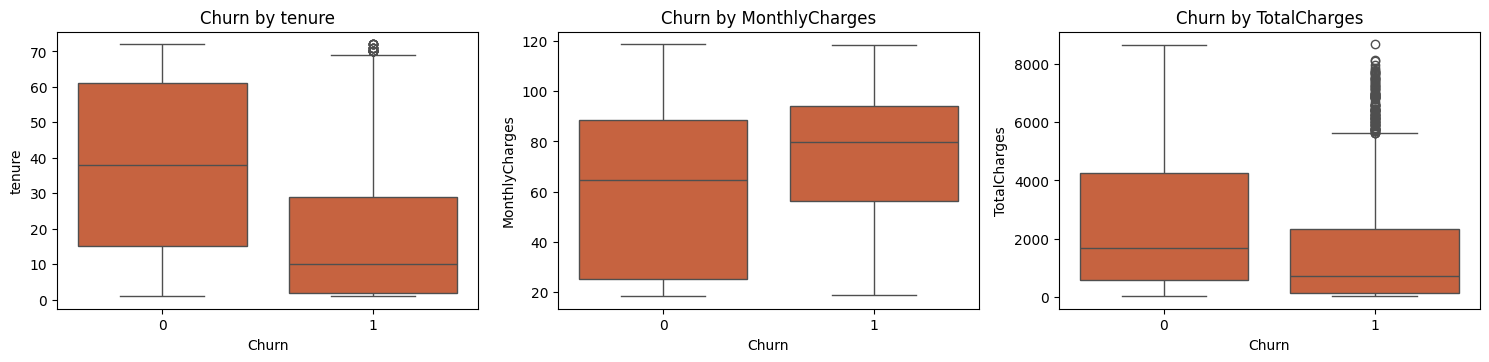

In [478]:
# Numerical variables - compare distributions
numerical_cols = ['tenure', 'MonthlyCharges', 
                  'TotalCharges']
# Numerical variables - compare distributions

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=data, color = '#DC582A')
    plt.title(f'Churn by {col}')
plt.tight_layout()
plt.show()


In [479]:
# List of categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'numAdminTickets', 'numTechTickets', 'Churn']

# Display frequency counts for each categorical column
for col in categorical_cols:
    print(f"Frequency counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Frequency counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


Frequency counts for SeniorCitizen:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64


Frequency counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Frequency counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Frequency counts for tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64


Frequency counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


Frequency counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Frequency counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Frequency counts for OnlineSecurity:
Onli

# 4. Churn Analysis (Customer demographic analysis)

In [480]:
#Calculate the overall churn rate
overall_churn_rate = data['Churn'].mean() * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.58%


In [481]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

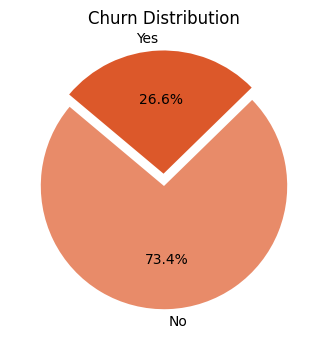

In [482]:
#Get Churn counts
churn_counts = data['Churn'].value_counts()
# Define your mapping
churn_labels = {0: 'No', 1: 'Yes'}

# Define explode (still exploding the "Yes" slice)
explode = (0, 0.1)

# Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ['No', 'Yes']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#E88B69','#DC582A'],
        explode=explode)
plt.title('Churn Distribution')
plt.show()

Churn by Gender

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\2272846570.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['No', 'Yes'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\2272846570.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['No', 'Yes'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\2272846570.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['No', 'Yes'])


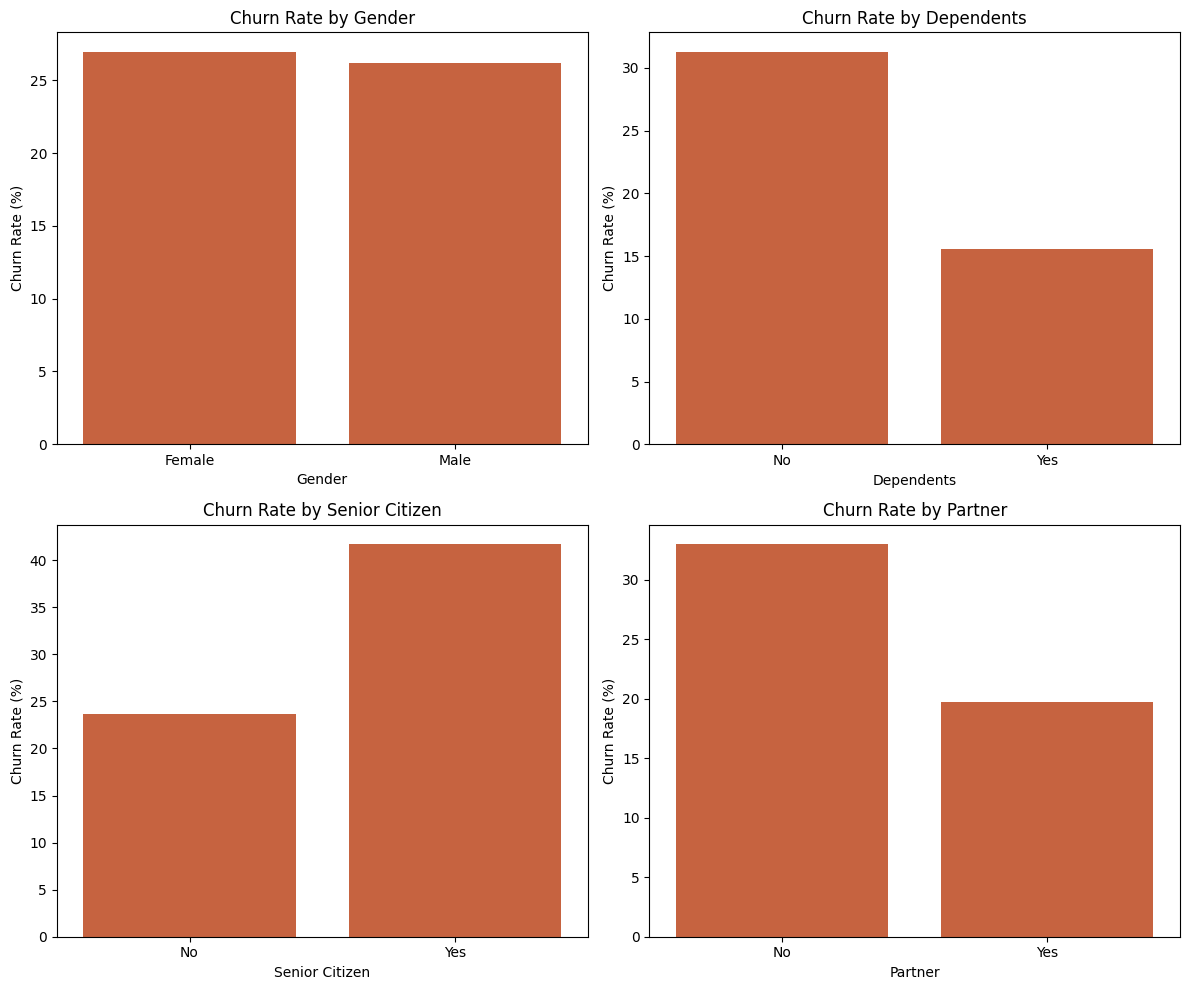

In [483]:
# Calculate churn rate by Gender
gender_churn = data.groupby('gender')['Churn'].mean() * 100

# Calculate churn rate by Dependents
dependents_churn = data.groupby('Dependents')['Churn'].mean() * 100

# Calculate churn rate by Senior Citizen
senior_churn = data.groupby('SeniorCitizen')['Churn'].mean() * 100

# Calculate churn rate by Partner
partner_churn = data.groupby('Partner')['Churn'].mean() * 100

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Churn rate by Gender
sns.barplot(x=gender_churn.index, y=gender_churn.values, color='#DC582A', ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate by Gender')
axes[0, 0].set_ylabel('Churn Rate (%)')
axes[0, 0].set_xlabel('Gender')

# Churn rate by Dependents
sns.barplot(x=dependents_churn.index, y=dependents_churn.values, color='#DC582A', ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Dependents')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].set_xlabel('Dependents')
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Churn rate by Senior Citizen
sns.barplot(x=senior_churn.index, y=senior_churn.values, color='#DC582A', ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Senior Citizen')
axes[1, 0].set_ylabel('Churn Rate (%)')
axes[1, 0].set_xlabel('Senior Citizen')
axes[1, 0].set_xticklabels(['No', 'Yes'])

# Churn rate by Partner
sns.barplot(x=partner_churn.index, y=partner_churn.values, color='#DC582A', ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate by Partner')
axes[1, 1].set_ylabel('Churn Rate (%)')
axes[1, 1].set_xlabel('Partner')
axes[1, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

Churn by Tenure

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\1815671540.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_churn.index, y='churn_rate', data=tenure_churn, palette=colors)


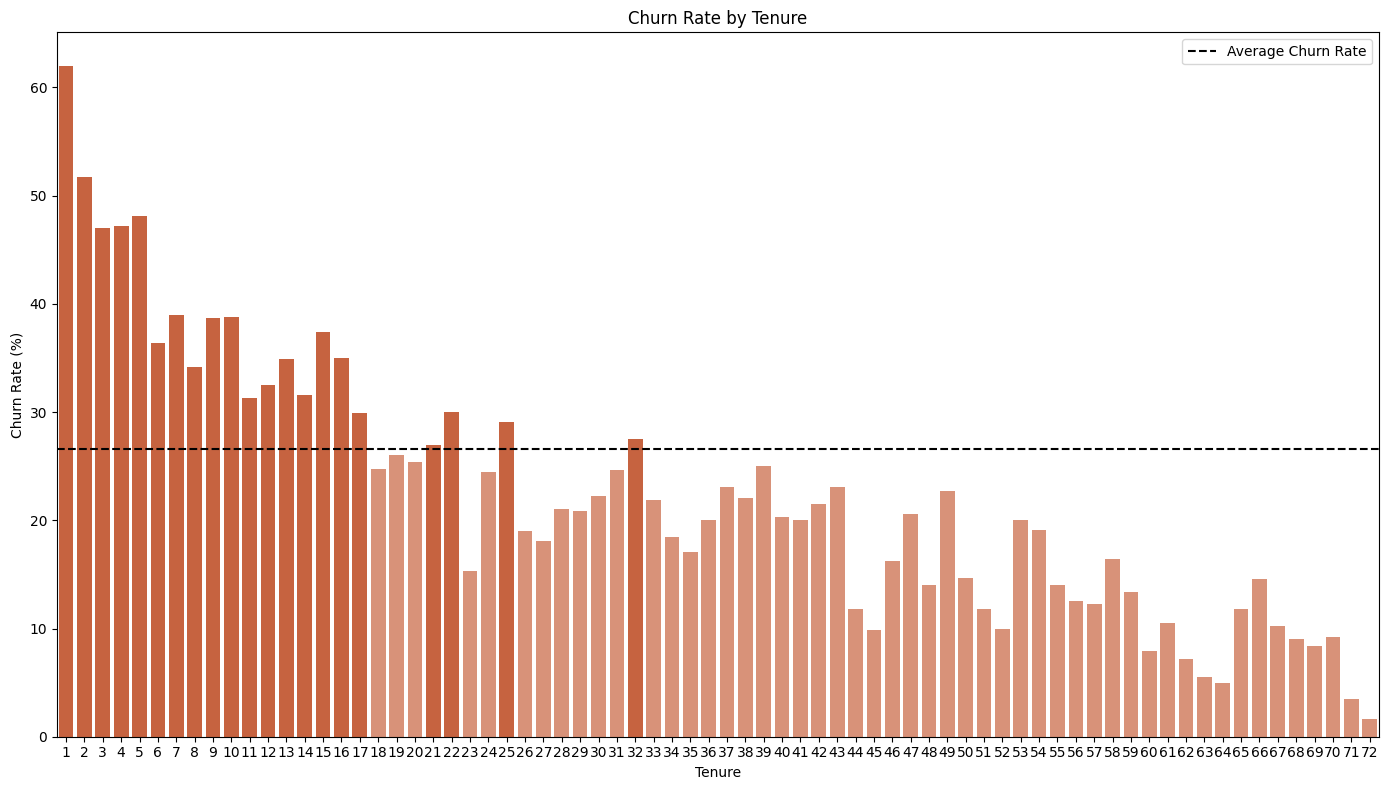

In [484]:
#Calculate churn rate by tenure
tenure_churn = data.groupby('tenure')['Churn'].agg(['mean', 'count'])
tenure_churn['churn_rate'] = tenure_churn['mean'] * 100 

# Highlight categories that are above the average churn rate
highlight_tenure = tenure_churn[tenure_churn['churn_rate'] >= overall_churn_rate].index

# Plot the results with highlighted categories
plt.figure(figsize=(14, 8))
colors = ['#DC582A' if tenure in highlight_tenure else '#E88B69' for tenure in tenure_churn.index]
sns.barplot(x=tenure_churn.index, y='churn_rate', data=tenure_churn, palette=colors)
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure')
plt.axhline(y=data['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\3014062139.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_group_churn = data.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\3014062139.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_group_churn.index, y='churn_rate', data=tenure_group_churn, palette=colors)


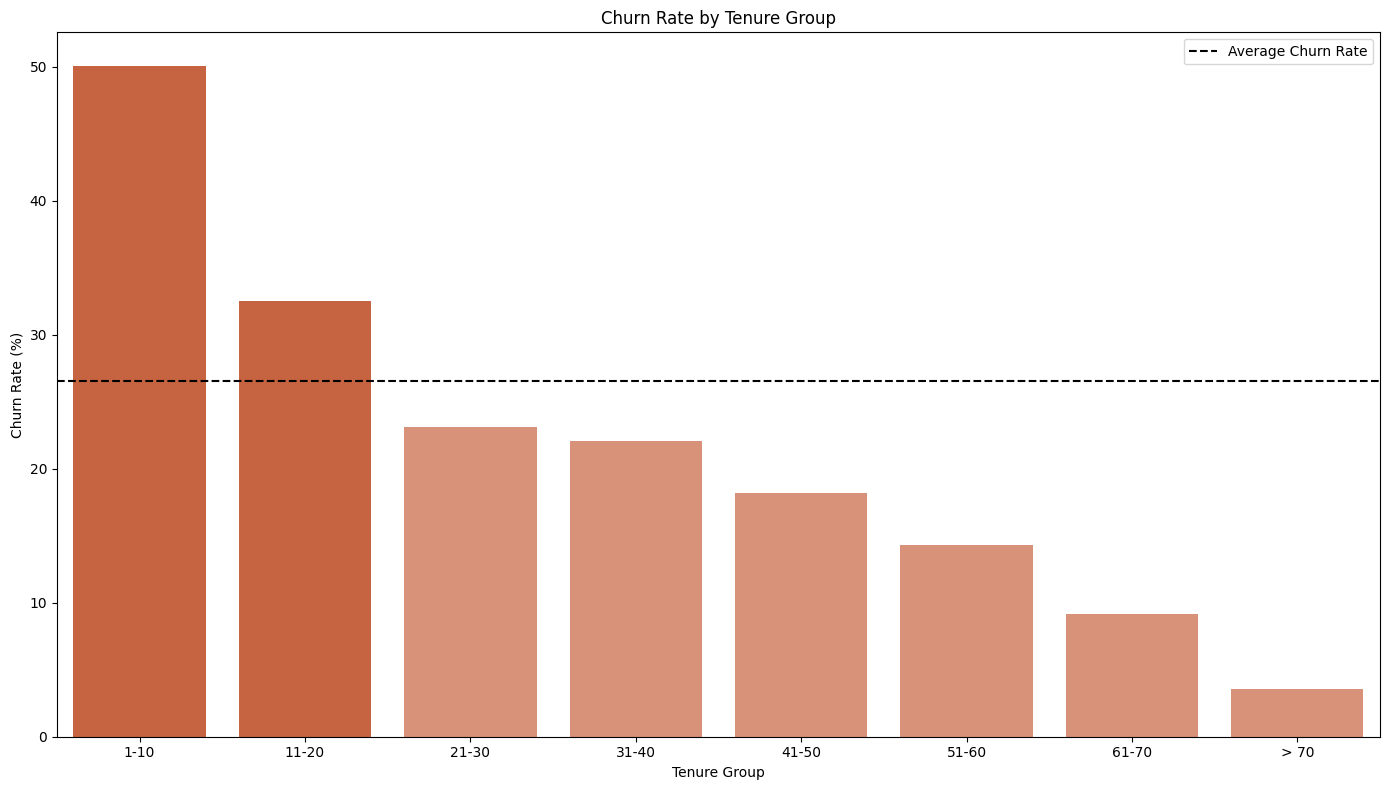

In [485]:
# Group tenure into bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '> 70']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate by tenure group
tenure_group_churn = data.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
tenure_group_churn['churn_rate'] = tenure_group_churn['mean'] * 100
tenure_group_churn = tenure_group_churn.sort_values(by='churn_rate', ascending=False)

# Highlight categories that are above the average churn rate
highlight_tenure_groups = tenure_group_churn[tenure_group_churn['churn_rate'] >= overall_churn_rate].index

# Plot the results with highlighted categories
plt.figure(figsize=(14, 8))
colors = ['#DC582A' if group in highlight_tenure_groups else '#E88B69' for group in tenure_group_churn.index]
sns.barplot(x=tenure_group_churn.index, y='churn_rate', data=tenure_group_churn, palette=colors)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.axhline(y=overall_churn_rate, color='#000000', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

In [530]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Month_Used'],
      dtype='object')

Churn by Internet, Phone, TV services

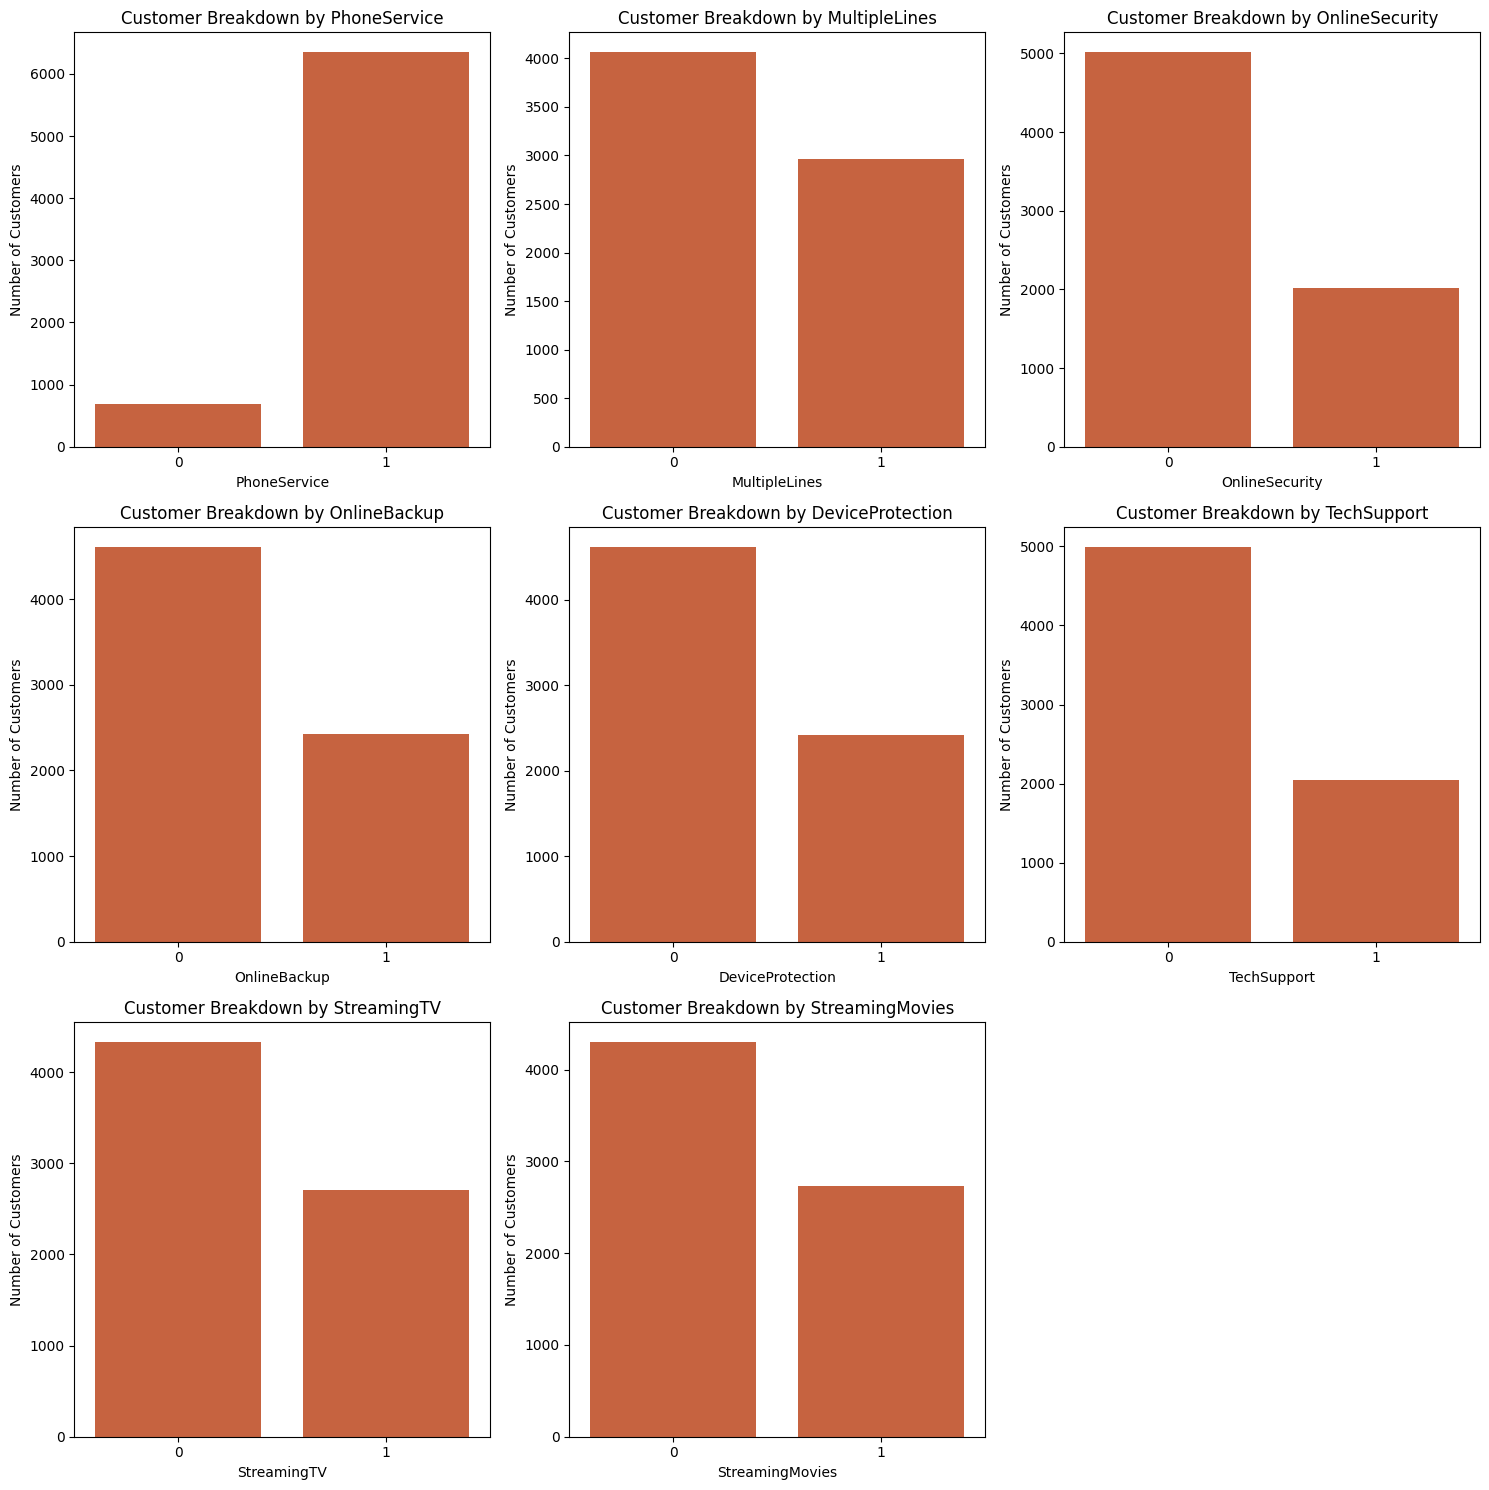

In [532]:
# List of service-related columns
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(service_cols):
    plt.subplot(3, 3, i + 1)
    service_counts = data[col].value_counts()
    sns.barplot(x=service_counts.index, y=service_counts.values, color='#DC582A')
    plt.title(f'Customer Breakdown by {col}')
    plt.ylabel('Number of Customers')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

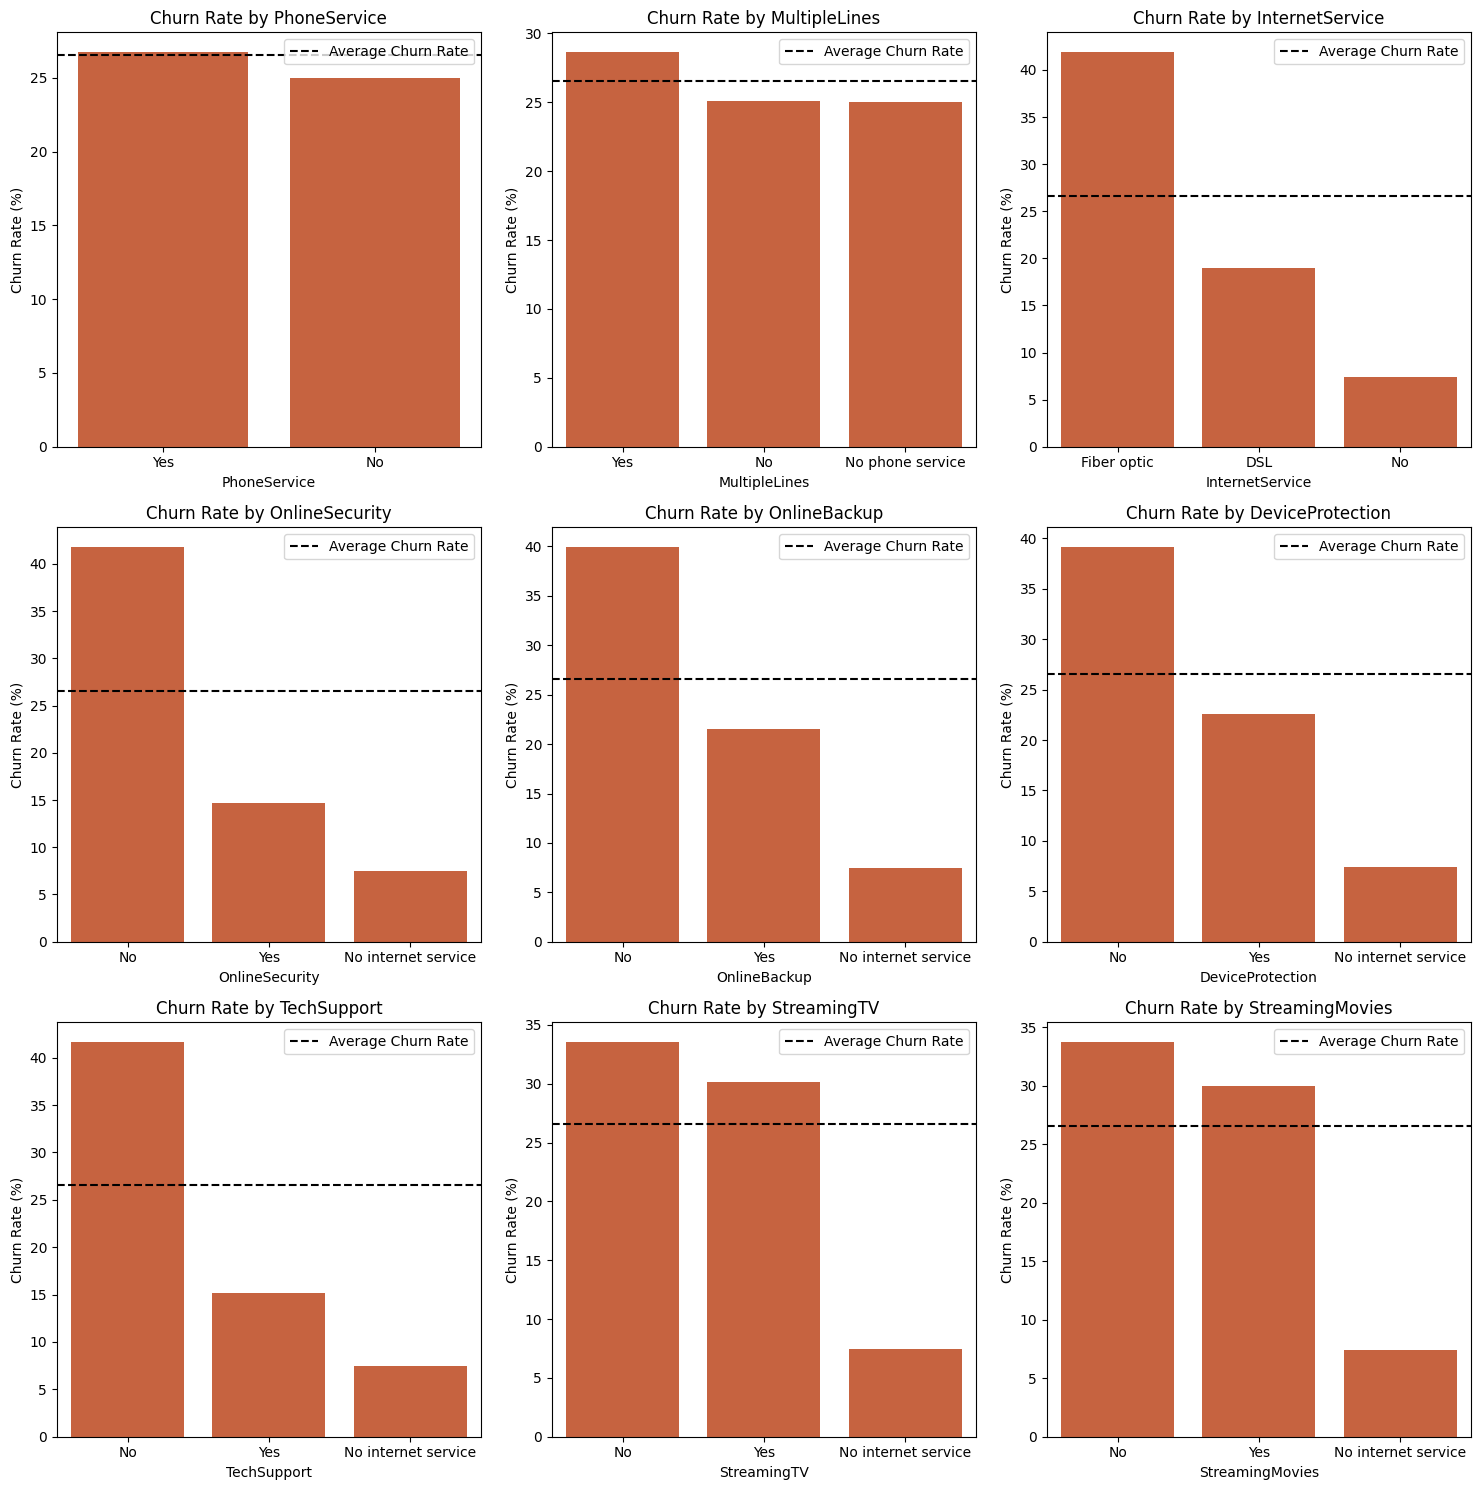

In [486]:
# List of service-related columns
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(service_cols):
    plt.subplot(3, 3, i + 1)
    service_churn = data.groupby(col)['Churn'].agg(['mean', 'count'])
    service_churn['churn_rate'] = service_churn['mean'] * 100 
    service_churn = service_churn.sort_values('churn_rate', ascending=False)
    sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn, color = '#DC582A')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.axhline(y=data['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
    plt.legend()

plt.tight_layout()
plt.show()

Churn by Monthly Charges

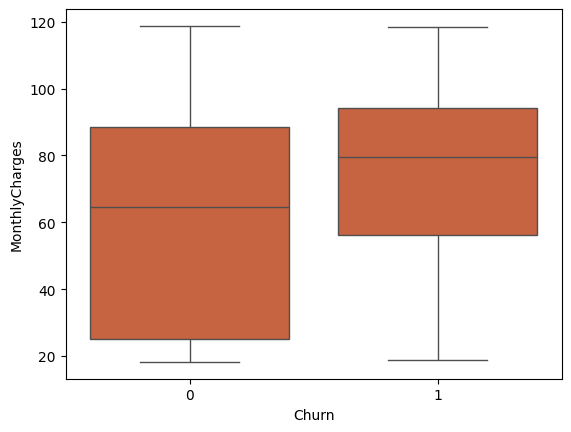

In [487]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, color = '#DC582A')
plt.show()

Churn by Total Charges

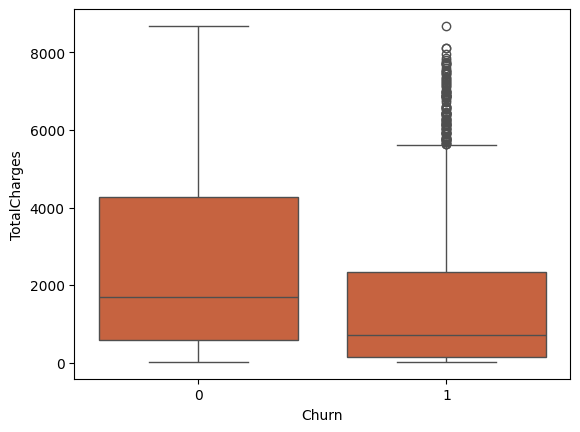

In [488]:
sns.boxplot(x='Churn', y='TotalCharges', data=data, color = '#DC582A')
plt.show()

Churn by Billing Methods

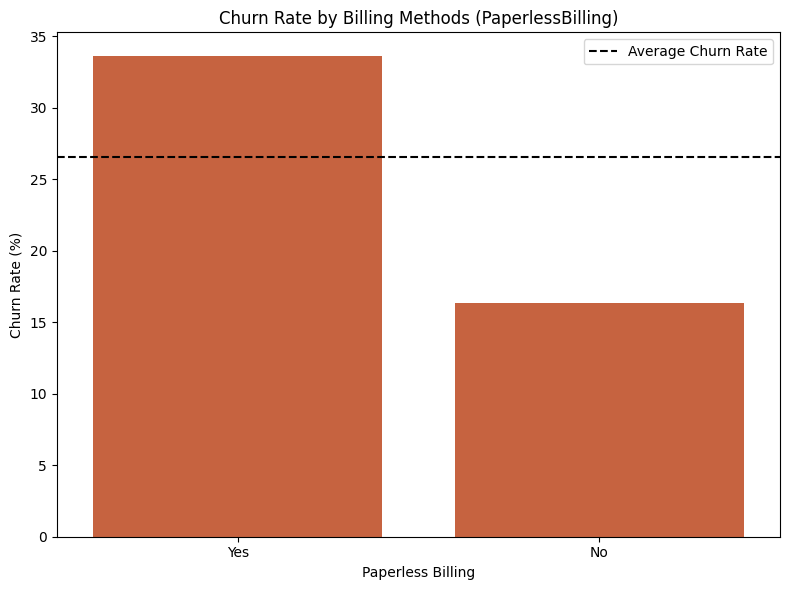

In [489]:
#Calculate churn rate by billing method (PaperlessBilling)
billing_churn = data.groupby('PaperlessBilling')['Churn'].agg(['mean', 'count'])
billing_churn['churn_rate'] = billing_churn['mean'] * 100
billing_churn = billing_churn.sort_values('churn_rate', ascending=False)

#Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=billing_churn.index, y='churn_rate', data=billing_churn, color = '#DC582A')
plt.title('Churn Rate by Billing Methods (PaperlessBilling)')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Paperless Billing')
plt.axhline(y=data['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

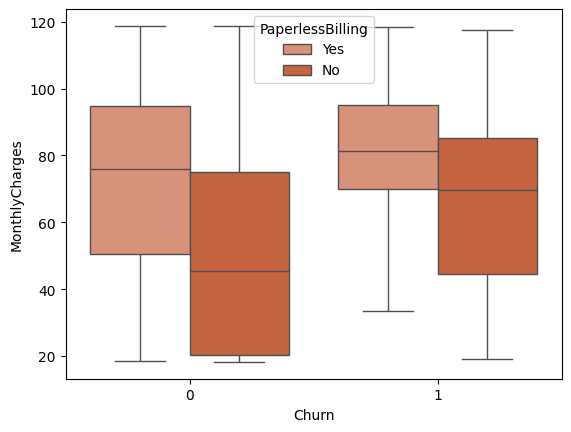

In [490]:
sns.boxplot(x = 'Churn',
            y = 'MonthlyCharges',
            data = data,
            fliersize = 0,
            hue = "PaperlessBilling",
            palette = ['#E88B69', '#DC582A'])

Churn by Contract Type

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\765790934.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_churn.index, y='churn_rate', data=contract_churn, palette=colors)


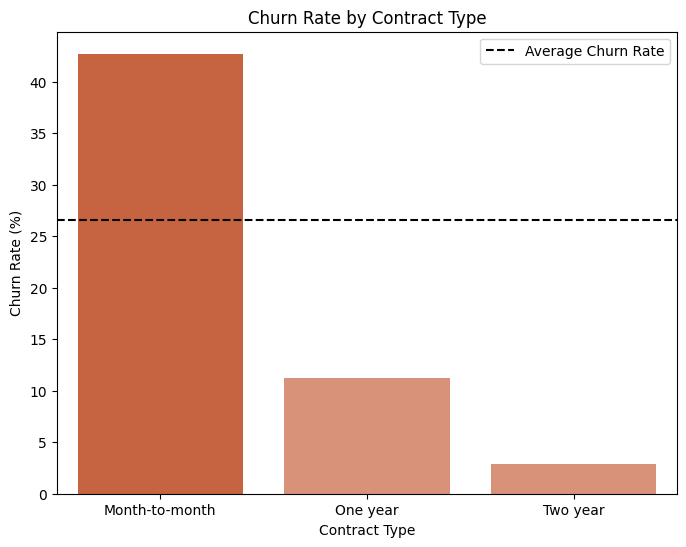

In [491]:
#Calculate Churn rate by Contract Type
contract_churn = data.groupby('Contract')['Churn'].agg(['mean', 'count'])
contract_churn['churn_rate'] = contract_churn['mean'] * 100
contract_churn = contract_churn.sort_values('churn_rate', ascending=False)

# Identify the contract type with the highest churn rate
highlight_contract = contract_churn.index[0]

# Plot churn rate by contract type
plt.figure(figsize=(8, 6))
colors = ['#DC582A' if contract == highlight_contract else '#E88B69' for contract in contract_churn.index]
sns.barplot(x=contract_churn.index, y='churn_rate', data=contract_churn, palette=colors)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.axhline(y=data['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.show()

Churn by Payment Method

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12960\1102603121.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_churn.index, y='churn_rate', data=payment_churn, palette=colors)


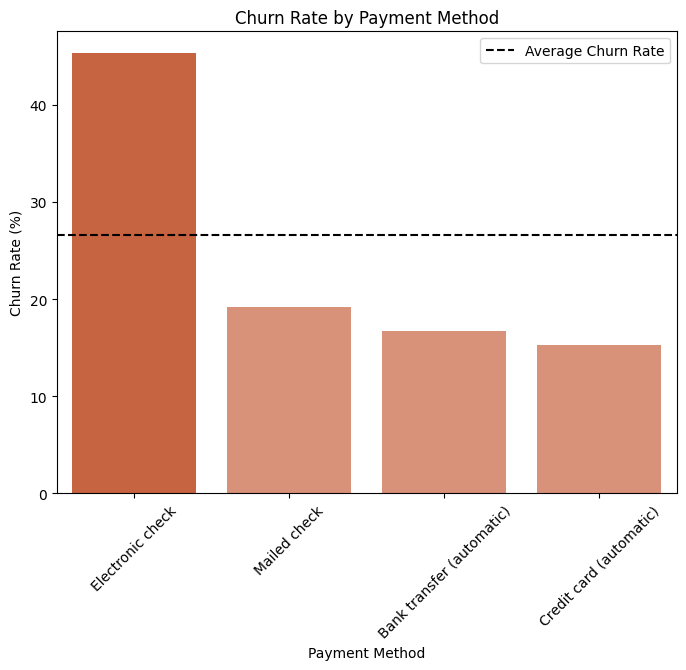

In [492]:
# Calculate churn rate by payment method
payment_churn = data.groupby('PaymentMethod')['Churn'].agg(['mean', 'count'])
payment_churn['churn_rate'] = payment_churn['mean'] * 100
payment_churn = payment_churn.sort_values('churn_rate', ascending=False)

# Identify the payment method with the highest churn rate
highlight = payment_churn.index[0]

# Plot churn rate by payment method
plt.figure(figsize=(8, 6))
colors = ['#DC582A' if method == highlight else '#E88B69' for method in payment_churn.index]
sns.barplot(x=payment_churn.index, y='churn_rate', data=payment_churn, palette=colors)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.axhline(y=data['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.show()

Churn by NumTechTickets

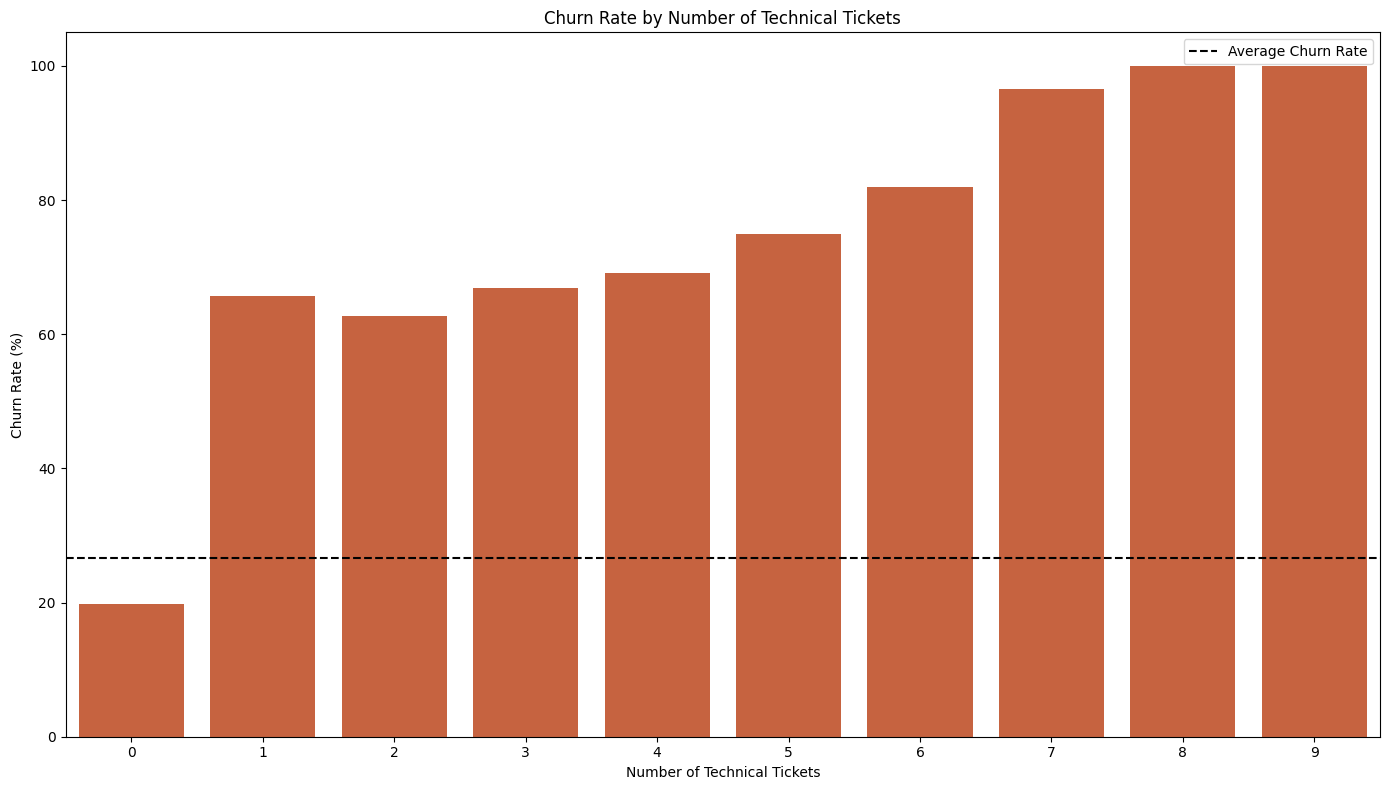

In [494]:
# Calculate churn rate by number of technical tickets
tech_churn = data.groupby('numTechTickets')['Churn'].agg(['mean', 'count'])
tech_churn['churn_rate'] = tech_churn['mean'] * 100
tech_churn = tech_churn.sort_values('churn_rate', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=tech_churn.index, y='churn_rate', data=tech_churn)
plt.title('Churn Rate by Number of Technical Tickets')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Number of Technical Tickets')
plt.axhline(y=data['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

Churn by Number of Admin Ticket

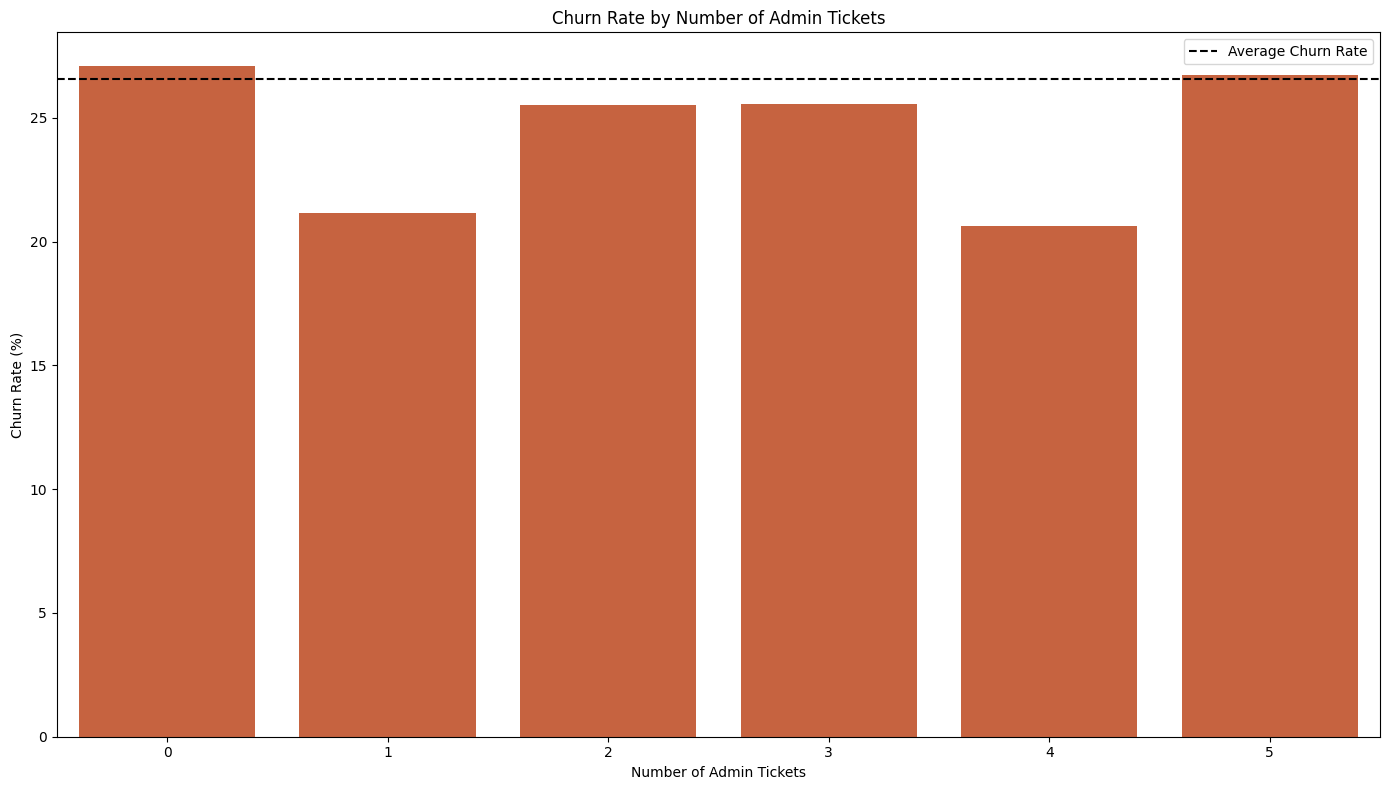

In [495]:
# Calculate churn rate by number of admin tickets
admin_churn = data.groupby('numAdminTickets')['Churn'].agg(['mean', 'count'])
admin_churn['churn_rate'] = admin_churn['mean'] * 100
admin_churn = admin_churn.sort_values('churn_rate', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=admin_churn.index, y='churn_rate', data=admin_churn, color='#DC582A')
plt.title('Churn Rate by Number of Admin Tickets')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Number of Admin Tickets')
plt.axhline(y=data['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

Preliminary Insights from Churn Analysis

- People with less years of tenure have higher risk of churning than those who have served for years.
- Regarding OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies, customers who do not opt for these features have higher chances of leaving the company.
- Customers who are charged higher monthly also tend to choose another company.
- Customers using Electronic check are more likely to churn.
- Customers who churned tend to have used paperless billing.


# 5. Feature Engineering

ContractType, PaymentMethod, Tenure

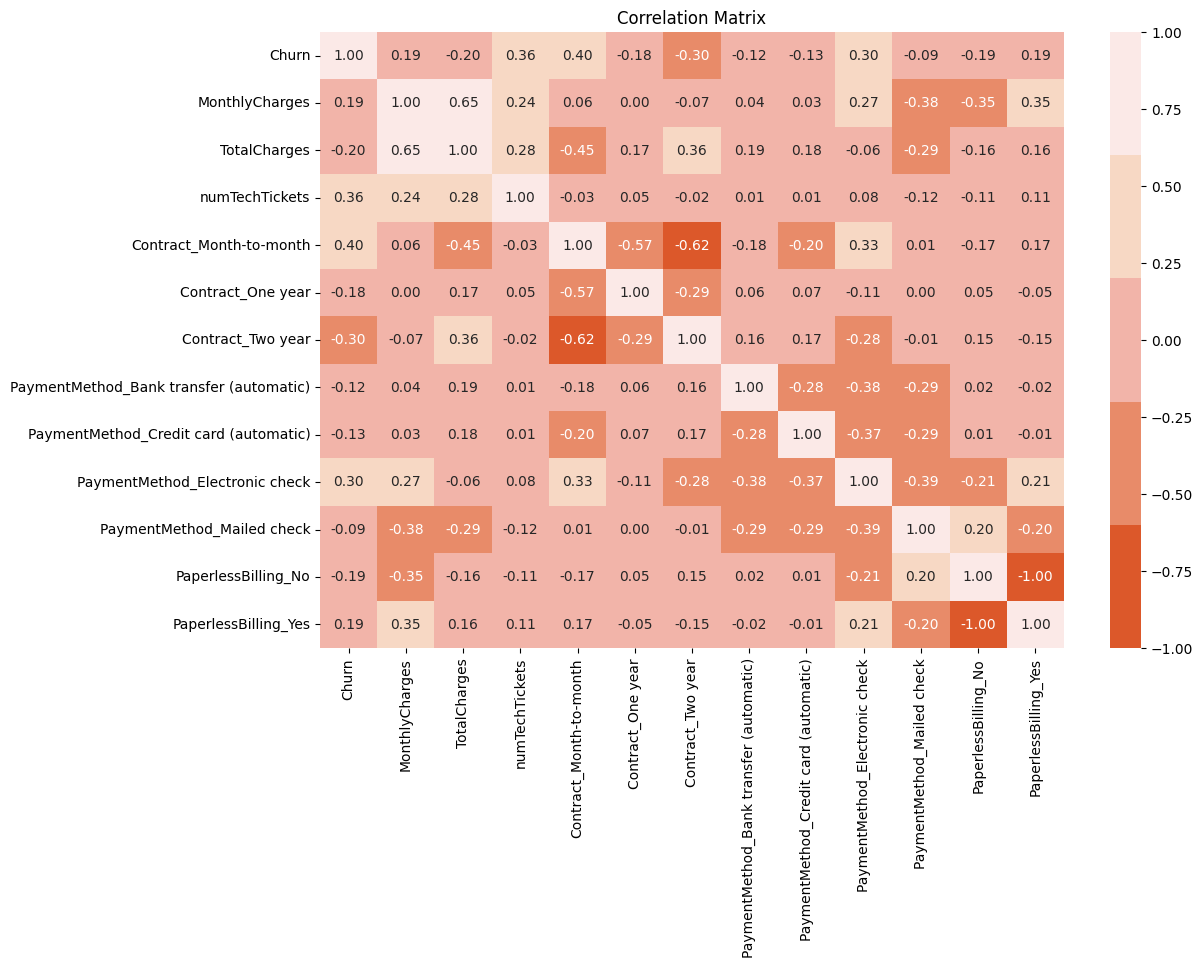

In [496]:
# Select relevant columns for correlation matrix
# Define PwC theme colors
pwc_colors = ['#DC582A', '#E88B69', '#F2B4A9', '#F7D8C4', '#FBE9E7']

# Select relevant columns for correlation matrix
correlation_cols = ['Churn', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'numTechTickets']

# Convert categorical columns to numerical
data_encoded = pd.get_dummies(data[correlation_cols])

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=pwc_colors, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Feature Encoding

In [497]:
# Encode categorical
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [498]:
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['StreamingTV'] = data['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})  
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['TechSupport'] = data['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})


In [499]:
# One-hot encode the 'Contract' column
contract_dummies = pd.get_dummies(data['Contract'], prefix='Contract')

# Concatenate the dummy variables with the original dataframe
data = pd.concat([data, contract_dummies], axis=1)

# Drop the original 'Contract' column
data.drop('Contract', axis=1, inplace=True)

# Display the first few rows to verify the changes
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,Electronic check,29.85,29.85,0,0,0,1-10,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,Mailed check,56.95,1889.50,0,0,0,31-40,False,True,False
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,Mailed check,53.85,108.15,0,0,1,1-10,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,Bank transfer (automatic),42.30,1840.75,0,3,0,41-50,False,True,False
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,Electronic check,70.70,151.65,0,0,1,1-10,True,False,False


In [500]:
# One-hot encode the 'PaymentMethod' column
payment_dummies = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')

# One-hot encode the 'InternetService' column
internet_dummies = pd.get_dummies(data['InternetService'], prefix='InternetService')

# Concatenate the dummy variables with the original dataframe
data = pd.concat([data, payment_dummies, internet_dummies], axis=1)

# Drop the original 'PaymentMethod' and 'InternetService' columns
data.drop(['PaymentMethod', 'InternetService'], axis=1, inplace=True)

# Display the first few rows to verify the changes
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,False,True,False,False,False,False,True,True,False,False
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,True,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,True,False,False,False,False,True,False,False,True,False


In [501]:
!pip install scikit-learn

from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data[numerical_cols].describe())

             tenure  MonthlyCharges  TotalCharges
count  7.032000e+03    7.032000e+03  7.032000e+03
mean  -1.126643e-16    6.062651e-17 -1.119064e-16
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.280248e+00   -1.547283e+00 -9.990692e-01
25%   -9.542963e-01   -9.709769e-01 -8.302488e-01
50%   -1.394171e-01    1.845440e-01 -3.908151e-01
75%    9.199259e-01    8.331482e-01  6.668271e-01
max    1.612573e+00    1.793381e+00  2.824261e+00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Feature Engineering

In [502]:
data[['MonthlyCharges', 'TotalCharges', 'tenure']].head()

,MonthlyCharges,TotalCharges,tenure
0,-1.161694,-0.994194,-1.280248
1,-0.260878,-0.173740,0.064303
2,-0.363923,-0.959649,-1.239504
3,-0.747850,-0.195248,0.512486
4,0.196178,-0.940457,-1.239504


In [503]:
data['Month_Used'] = data['TotalCharges'] / data['MonthlyCharges']
data[['MonthlyCharges', 'TotalCharges', 'Month_Used']].head()

,MonthlyCharges,TotalCharges,Month_Used
0,-1.161694,-0.994194,0.855814
1,-0.260878,-0.173740,0.665981
2,-0.363923,-0.959649,2.636954
3,-0.747850,-0.195248,0.261079
4,0.196178,-0.940457,-4.793894


# 6. Modelling


In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   object  
 1   gender                                   7032 non-null   int64   
 2   SeniorCitizen                            7032 non-null   int64   
 3   Partner                                  7032 non-null   int64   
 4   Dependents                               7032 non-null   int64   
 5   tenure                                   7032 non-null   float64 
 6   PhoneService                             7032 non-null   int64   
 7   MultipleLines                            7032 non-null   int64   
 8   OnlineSecurity                           7032 non-null   int64   
 9   OnlineBackup                             7032 non-null   int64   
 10  DeviceProtection                         

Logistic Regression

In [505]:
data.drop(columns = ['customerID', 'tenure_group'], inplace=True)

In [506]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1408  141]
 [ 183  378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1549
           1       0.73      0.67      0.70       561

    accuracy                           0.85      2110
   macro avg       0.81      0.79      0.80      2110
weighted avg       0.84      0.85      0.84      2110



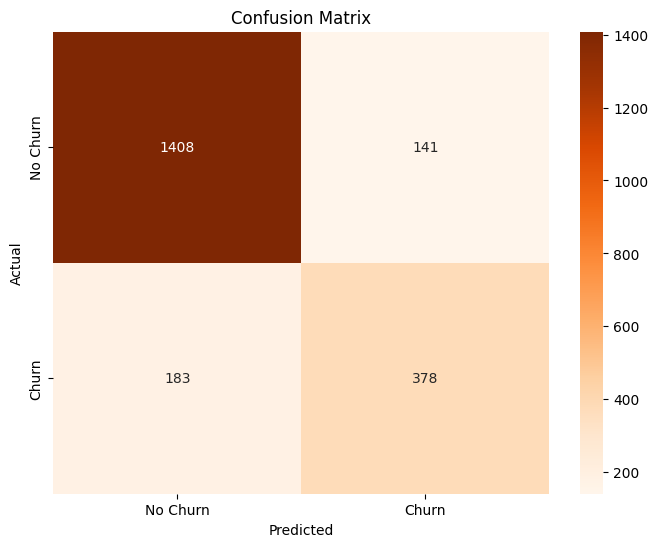

In [517]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

Decision Tree - Confusion Matrix:
[[1331  218]
 [ 196  365]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1549
           1       0.63      0.65      0.64       561

    accuracy                           0.80      2110
   macro avg       0.75      0.75      0.75      2110
weighted avg       0.81      0.80      0.80      2110



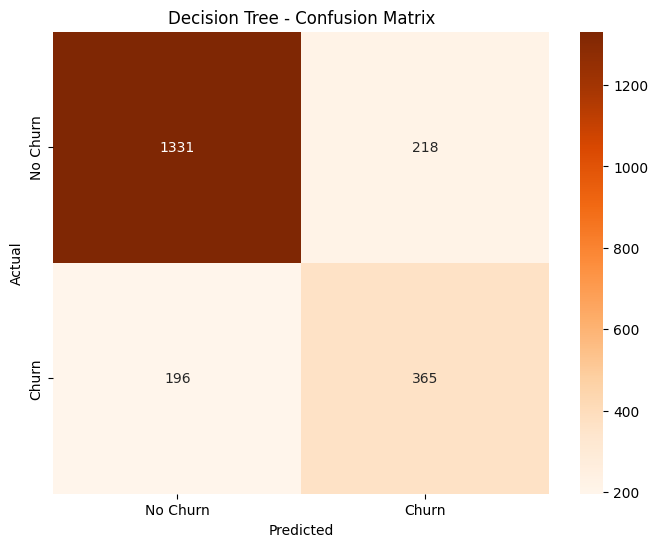

In [518]:
# prompt: import Decision Tree from sklearn

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Compute the confusion matrix for Decision Tree
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Tuned Decision Tree - Confusion Matrix:
[[1395  154]
 [ 204  357]]

Tuned Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1549
           1       0.70      0.64      0.67       561

    accuracy                           0.83      2110
   macro avg       0.79      0.77      0.78      2110
weighted avg       0.83      0.83      0.83      2110



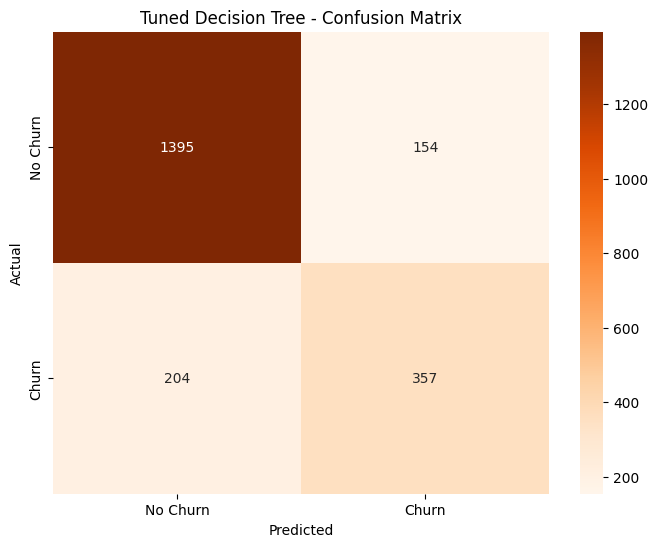

In [519]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree model with the best parameters
dtree_best = DecisionTreeClassifier(**best_params)
dtree_best.fit(X_train, y_train)

# Make predictions
y_pred_dtree_best = dtree_best.predict(X_test)

# Evaluate the model
print("Tuned Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree_best))
print("\nTuned Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dtree_best))

# Compute the confusion matrix for the tuned Decision Tree
cm_dtree_best = confusion_matrix(y_test, y_pred_dtree_best)

# Plot the confusion matrix for the tuned Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree_best, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Decision Tree - Confusion Matrix')
plt.show()

Random Forest

Random Forest - Confusion Matrix:
[[1410  139]
 [ 186  375]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1549
           1       0.73      0.67      0.70       561

    accuracy                           0.85      2110
   macro avg       0.81      0.79      0.80      2110
weighted avg       0.84      0.85      0.84      2110



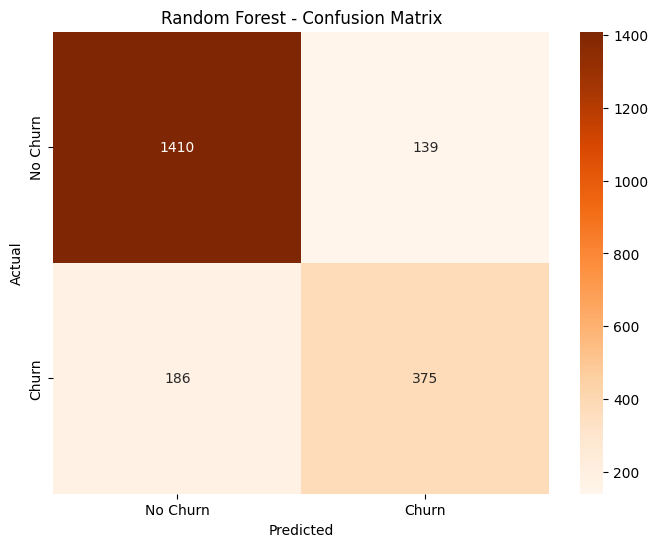

In [520]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Compute the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
554 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest - Confusion Matrix:
[[1424  125]
 [ 183  378]]

Tuned Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1549
           1       0.75      0.67      0.71       561

    accuracy                           0.85      2110
   macro avg       0.82      0.80      0.81      2110
weighted avg       0.85      0.85      0.85      2110



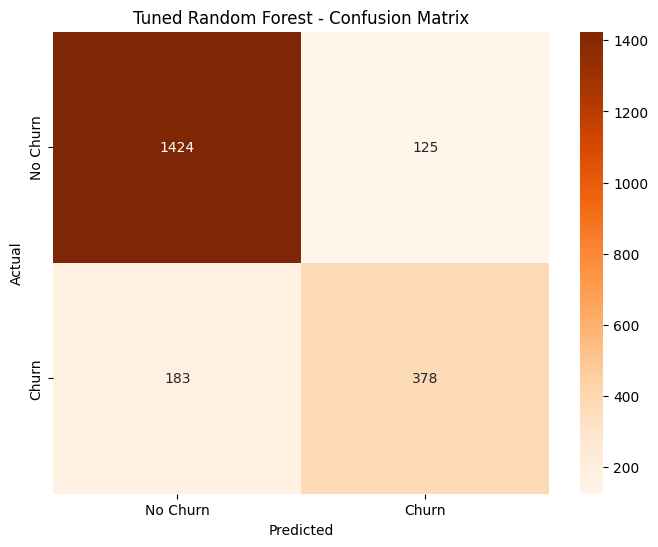

In [521]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters: {best_params_rf}")

# Train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate the model
print("Tuned Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("\nTuned Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf_best))

# Compute the confusion matrix for the tuned Random Forest
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Plot the confusion matrix for the tuned Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest - Confusion Matrix')
plt.show()

SVM

SVM - Confusion Matrix:
[[1407  142]
 [ 191  370]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1549
           1       0.72      0.66      0.69       561

    accuracy                           0.84      2110
   macro avg       0.80      0.78      0.79      2110
weighted avg       0.84      0.84      0.84      2110



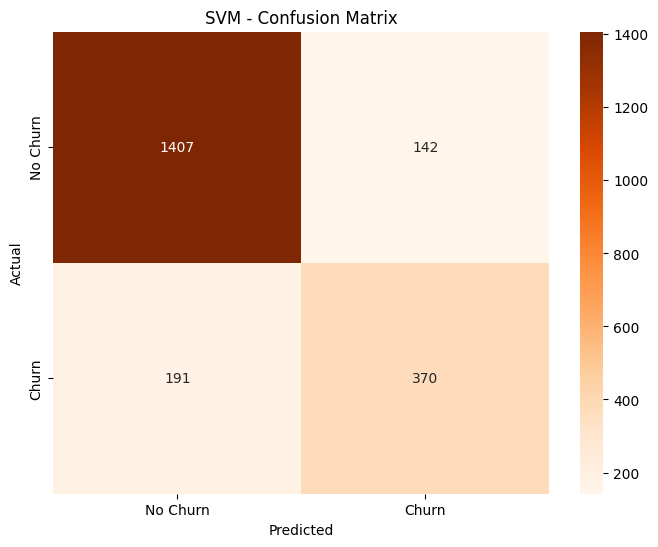

In [522]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Compute the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

# 7. Model Evaluation

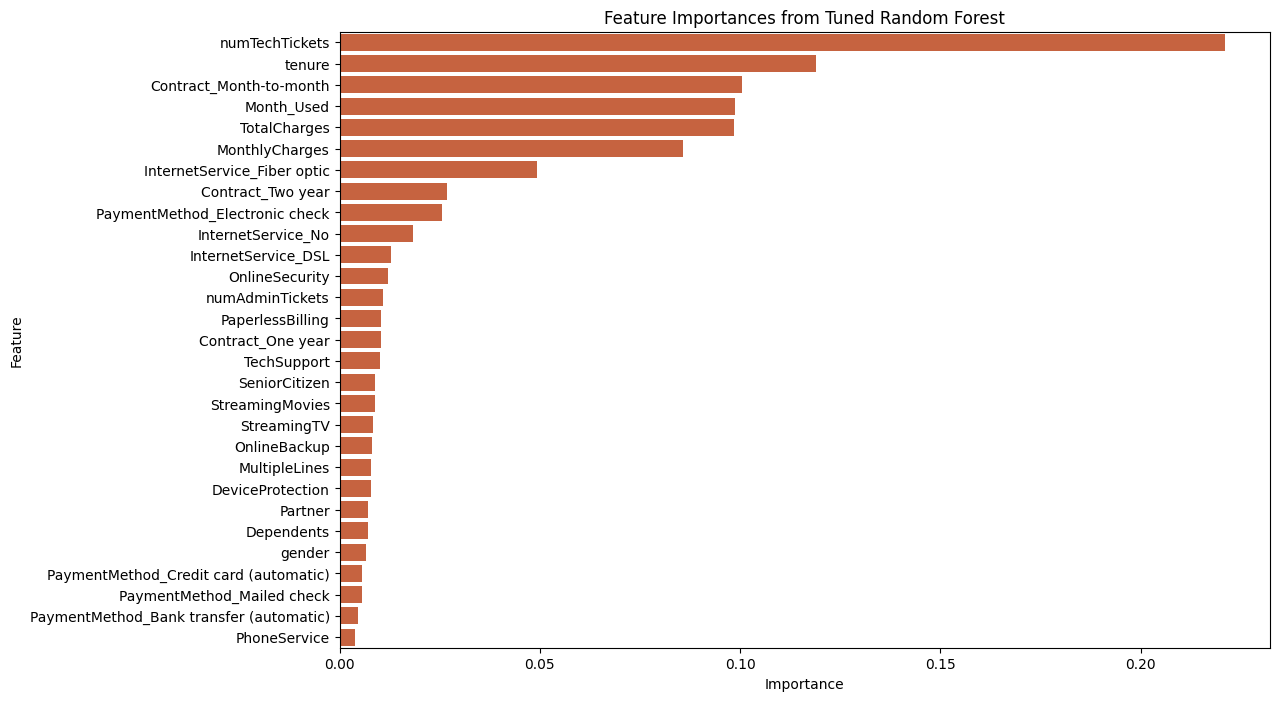

In [515]:
# Get feature importances from the tuned Random Forest model
feature_importances = rf_best.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color = '#DC582A')
plt.title('Feature Importances from Tuned Random Forest')
plt.show()

# 8. Insights and Recommendations

### **Key Factors Driving Churn**  
1. **`numTechTickets`** - Frequent technical issues increase churn risk.  
2. **`tenure`** - Newer customers are more likely to churn.  
3. **`Contract_Month-to-month`** - Flexible contracts show higher churn.  
4. **`TotalCharges` & `MonthlyCharges`** - Higher costs may lead to dissatisfaction.  
5. **`InternetService_Fiber optic`** - Potential issues with service or pricing.  

---

### **How to Reduce Churn**  
- **Enhance Support**: Resolve tech issues faster.  
- **Incentivize Loyalty**: Offer discounts for long-term contracts.  
- **Review Pricing**: Adjust high-cost plans, especially fiber optic.  
- **Proactive Outreach**: Engage with at-risk customers early.

Strategy to Reduce Churn

**Customer Retention Programs**
- Loyalty Discounts: provide discounts to long-tenure customers and those using multiple services like TechSupport and Streaming.
- New Customer Offers: Introduce incentives like 3-month service discounts or bonus features for new customers to increase initial engagement.
- Bundled Packages: Offer discounts for customers who subscribe to additional services (e.g., OnlineSecurity + Streaming).
- Reward Programs: Implement a points-based loyalty program where longer-term customers gain exclusive perks.

**Billing & Payment Flexibility**
- Flexible payment methods: promote stable payment options like bank transfers or credit cards over electronic checks, which are linked to higher churn.
- Payment plans: allow customers to split higher monthly charges into smaller, more manageable payments.
- Switch options: provide easy switching between billing methods to accommodate changing customer preferences.

**Service Quality Improvements**
- Technical Support Enhancement: Speed up resolution times for tech tickets and ensure first-contact resolution for common issues.
- Improve Internet Services: Conduct service audits, especially for fiber optic customers, to ensure high speed and reliability.
- Proactive Issue Detection: Use data analytics to detect service interruptions and notify customers with updates and solutions proactively.
- Feedback System: Collect feedback after every tech support interaction and act on recurring issues.

**Proactive Customer Engagement**
- Churn Prediction Model: use machine learning to identify at-risk customers based on key factors like monthly charges, shorter tenure or multiple tech tickets.
- Targeted Outreach: Reach out to at-risk customers offering personalized discounts, service upgrades, or technical support.
- Regular Check-ins: Contact customers who haven't interacted in a while or those using paperless billing (as they’re more likely to churn).